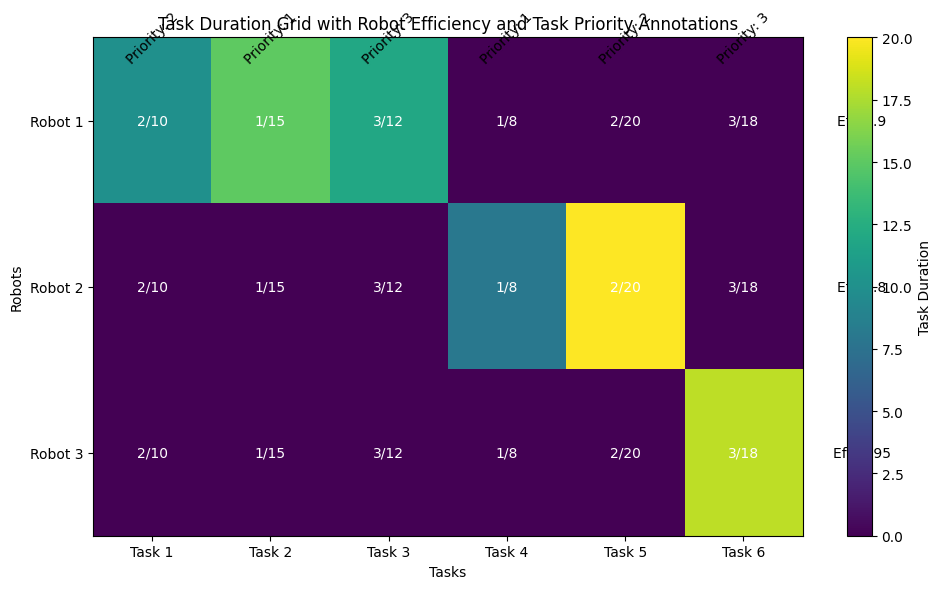

Total Production Time (Ttotal): 41.11111111111111
Workload Balance (B): 9.346800698354754


In [ ]:
import numpy as np

# Sample data representing robots, tasks, and efficiencies
robots = [
    {'id': 1, 'tasks': [1, 2, 3], 'efficiency': 0.9},
    {'id': 2, 'tasks': [4, 5], 'efficiency': 0.8},
    {'id': 3, 'tasks': [6], 'efficiency': 0.95}
]

tasks = [
    {'id': 1, 'priority': 2, 'time': 10},
    {'id': 2, 'priority': 1, 'time': 15},
    {'id': 3, 'priority': 3, 'time': 12},
    {'id': 4, 'priority': 1, 'time': 8},
    {'id': 5, 'priority': 2, 'time': 20},
    {'id': 6, 'priority': 3, 'time': 18}
]

# Function to calculate total production time
def total_production_time(robots, tasks):
    total_times = []
    for robot in robots:
        max_time = 0
        for task_id in robot['tasks']:
            task = next((task for task in tasks if task['id'] == task_id), None)
            if task:
                time_taken = task['time'] / robot['efficiency']
                if time_taken > max_time:
                    max_time = time_taken
        total_times.append(max_time)
    return max(total_times)

# Function to compute workload balance
def workload_balance(robots, tasks):
    total_times = []
    for robot in robots:
        total_time = 0
        for task_id in robot['tasks']:
            task = next((task for task in tasks if task['id'] == task_id), None)
            if task:
                total_time += task['time'] / robot['efficiency']
        total_times.append(total_time)
    return np.std(total_times)

# Fitness function to minimize both total production time and workload balance
def fitness_function(robots, tasks):
    total_time = total_production_time(robots, tasks)
    balance = workload_balance(robots, tasks)
    # Assuming task priorities are taken into account somehow (not specified in detail)
    # You may need to adjust this part
import numpy as np
import matplotlib.pyplot as plt

# Create a 2D array to represent the grid
grid = np.zeros((len(robots), len(tasks)))

# Fill the grid with task durations
for i, robot in enumerate(robots):
    for task_id in robot['tasks']:
        task_index = task_id - 1
        grid[i][task_index] = tasks[task_index]['time']

# Create the plot
plt.figure(figsize=(10, 6))
plt.imshow(grid, cmap='viridis', aspect='auto')

# Annotate task durations and priorities
for i in range(len(robots)):
    for j in range(len(tasks)):
        plt.text(j, i, f"{tasks[j]['priority']}/{tasks[j]['time']}",
                 ha='center', va='center', color='white')

# Annotate robot efficiencies
for i, robot in enumerate(robots):
    plt.text(len(tasks), i, f"Eff: {robot['efficiency']}",
             ha='center', va='center', color='black')

# Annotate task priorities
for j, task in enumerate(tasks):
    plt.text(j, -0.5, f"Priority: {task['priority']}",
             ha='center', va='center', color='black', rotation=45)

plt.xticks(np.arange(len(tasks)), [f"Task {task['id']}" for task in tasks])
plt.yticks(np.arange(len(robots)), [f"Robot {robot['id']}" for robot in robots])

plt.xlabel('Tasks')
plt.ylabel('Robots')
plt.title('Task Duration Grid with Robot Efficiency and Task Priority Annotations')

plt.colorbar(label='Task Duration')

plt.tight_layout()
plt.show()

# Function to calculate total production time
def total_production_time(robots, tasks):
    max_time = 0
    for robot in robots:
        total_time = sum(task['time'] for task in tasks if task['id'] in robot['tasks'])
        robot_time = total_time / robot['efficiency']
        if robot_time > max_time:
            max_time = robot_time
    return max_time

# Calculate total production time
Ttotal = total_production_time(robots, tasks)
print("Total Production Time (Ttotal):", Ttotal)


# Function to calculate total time for each robot
def total_time_for_robot(robot, tasks):
    total_time = sum(task['time'] for task in tasks if task['id'] in robot['tasks'])
    return total_time / robot['efficiency']

# Function to calculate workload balance (standard deviation of total times)
def workload_balance(robots, tasks):
    total_times = [total_time_for_robot(robot, tasks) for robot in robots]
    return np.std(total_times)

# Calculate workload balance
B = workload_balance(robots, tasks)
print("Workload Balance (B):", B)